In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import shap
sns.set(style = 'ticks',color_codes = True)

In [8]:
## Reading the data set from the local folder of the machine.
train_df    = pd.read_csv('train.csv')
test_df     = pd.read_csv('test.csv')
features_df = pd.read_csv('features.csv')
stores_df   = pd.read_csv('stores.csv')

In [9]:
## Checking the first 5 columns of the train data frame.
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
## Checking the data types of the columns in the train data frames.
train_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [11]:
## Checking the data types of the test data frame.
test_df.dtypes

Store             int64
Dept              int64
Date             object
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1        object
MarkDown2        object
MarkDown3        object
MarkDown4        object
MarkDown5       float64
CPI              object
Unemployment     object
dtype: object

In [12]:
## Merging the stores data frame and the feature data frame(left_join).
train_dataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')
test_dataset = test_df.merge(stores_df, how='left')

In [13]:
# Viewing the first 5 rows of the train data set.
train_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [14]:
## Describing the statistics of the data sets.
train_dataset.describe(include= 'all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,NaN,7612.030000,NaN,NaN,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,NaN,20205.852500,NaN,NaN,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000


In [15]:
## Find out the Percentage of the NULL values for each individual feature.
(train_dataset.isna().sum()/len(train_dataset['Store']))*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

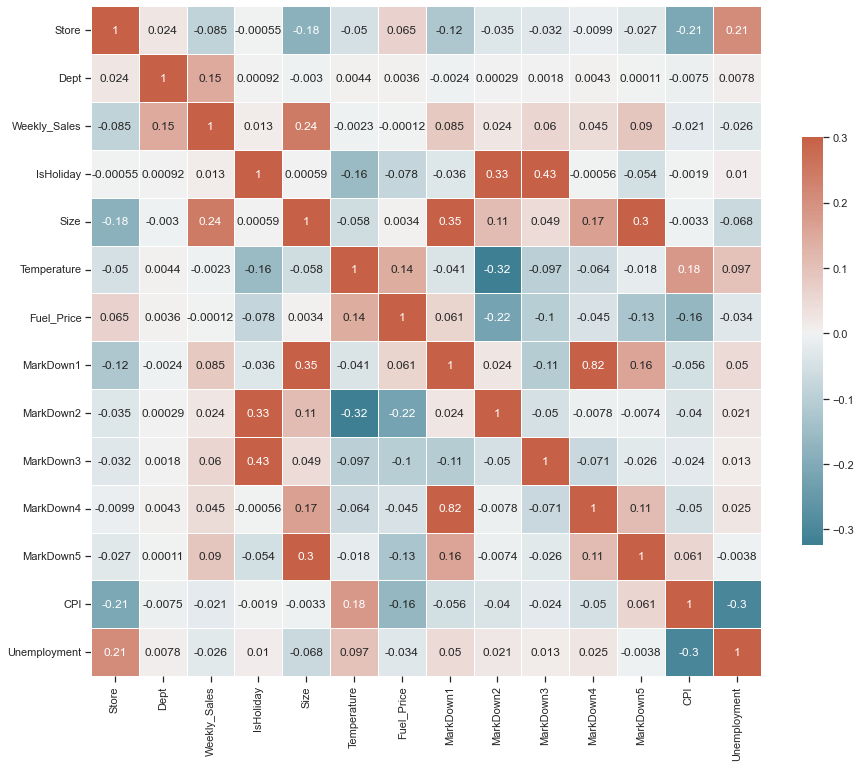

In [16]:
## Plotting the correlation matrix of the features in the data sets.
corr = train_dataset.corr()
f,ax = plt.subplots(figsize = (15,15))
cmap = sns.diverging_palette(220,20,as_cmap=True)
sns.heatmap(corr,cmap=cmap,vmax=0.3,center = 0,annot = True,square = True
            ,linewidths=0.5,cbar_kws={'shrink':0.5})
plt.show()

In [17]:
shap.initjs()

In [18]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [19]:
train_dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = train_dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0.0)
train_dataset['Year']  = pd.to_datetime(train_dataset['Date']).dt.year
train_dataset['Month'] = pd.to_datetime(train_dataset['Date']).dt.month
train_dataset['Week']  = pd.to_datetime(train_dataset['Date']).dt.isocalendar().week

In [20]:
# Dropping the Columns 
train_dataset = train_dataset.drop(columns=['Date'])

In [21]:
# Moving the target variable to the end.
df = train_dataset.pop('Weekly_Sales')
train_dataset['Weekly_Sales'] = df

In [41]:
train_dataset.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Weekly_Sales
0,1,1,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,24924.50
1,1,1,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,6,46039.49
2,1,1,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,7,41595.55
3,1,1,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,8,19403.54
4,1,1,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,9,21827.90


## Feature Selection/Engineering

In [45]:
## Groupby "Store","Dept","Week","IsHoliday" features of the training data set.
train_dataset_gp = train_dataset.groupby(['Store','Dept','Week','IsHoliday']).median().fillna(0.0)

In [83]:
train_dataset.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Weekly_Sales
0,1,1,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,24924.50
1,1,1,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,6,46039.49
2,1,1,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,7,41595.55
3,1,1,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,8,19403.54
4,1,1,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,9,21827.90


In [82]:
train_dataset_gp.head()

Size  Temperature  Fuel_Price  MarkDown1  \
Store Dept Week IsHoliday                                                 
1     1    1    False      151315.0       48.640      3.0665   3138.695   
           2    False      151315.0       41.965      3.1220   2591.645   
           3    False      151315.0       49.075      3.1420   2069.935   
           4    False      151315.0       49.045      3.1500    582.230   
           5    False      151315.0       42.310      2.9890      0.000   

                           MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Store Dept Week IsHoliday                                               
1     1    1    False      10906.580      71.55    725.065   4241.500   
           2    False       4012.935      21.12    226.540   1859.690   
           3    False       1403.595      16.94    250.310   1700.105   
           4    False        541.370      22.00      5.500    611.095   
           5    False          0.000       0.00      0.000      0.000   

                                  CPI  Unemployment    Year  Month  \
Store Dept Week IsHoliday                                            
1     1    1    False      215.559500         7.545  2011.5    1.0   
           2    False      215.674969         7.545  2011.5    1.0   
           3    False      215.906462         7.545  2011.5    1.0   
           4    False      216.137955         7.545  2011.5    1.0   
           5    False      212.566881         7.742  2011.0    2.0   

                           Weekly_Sales  
Store Dept Week IsHoliday                
1     1    1    False         16275.965  
           2    False         17127.050  
           3    False         17853.285  
           4    False         18419.670  
           5    False         23510.490

In [68]:
#Select everything from the list , not but the last one.
features_inp , target_feture = train_dataset_gp.columns[:-1],train_dataset_gp.columns[-1]

In [69]:
## Splitting into the feature and target data set.
features_data , target_data = train_dataset_gp[features_inp].copy(), train_dataset_gp[target_feture].copy()

In [78]:
numerical_column = train_dataset_gp[features_inp].select_dtypes(include = np.number).columns.to_list()
categorical_column = train_dataset_gp[features_inp].select_dtypes(include = 'object').columns.tolist()

In [72]:
## Developing the pipeline of imputation and min_max_scaler()
from sklearn.pipeline import make_pipeline

In [73]:
pipe = make_pipeline(SimpleImputer(),MinMaxScaler())
impu_scaler = pipe.fit(features_data[numerical_column])
features_data[numerical_column] = impu_scaler.transform(features_data[numerical_column])

In [74]:
def label_enco(df):
    le = LabelEncoder()
    for col in df.columns :
        if df[col].dtype == "object" or df[col].dtype == "bool" :
            df[col] = le.fit_transform(df[col])

In [75]:
#Performing the label encoding of the dataset if the feature is of type object or bool.
label_enco(features_data)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(features_data[numerical_column + categorical_column]
                                                 ,target_data,test_size= 0.20,random_state=42)

In [108]:
x_train.head()

,,,,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month
Store,Dept,Week,IsHoliday,,,,,,,,,,,,
9,77,48,False,0.492338,0.444242,0.337084,0.015845,0.002536,0.009598,0.009541,0.076701,0.954053,0.208453,0.50,1.000000
36,17,12,False,0.027253,0.677181,0.498721,0.000000,0.002536,0.000205,0.000000,0.000000,0.864387,0.432816,0.50,0.181818
42,10,34,False,0.026063,0.842031,0.588235,0.000000,0.002536,0.000205,0.000000,0.000000,0.031882,0.419590,0.50,0.636364
28,54,28,False,0.927901,0.921798,0.450128,0.000000,0.002536,0.000205,0.000000,0.000000,0.015626,0.954811,0.25,0.545455
31,7,33,False,0.914088,0.889891,0.532481,0.000000,0.002536,0.000205,0.000000,0.000000,0.883989,0.380774,0.50,0.636364


## Model Developement

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
tree = DecisionTreeRegressor(random_state=0)

In [86]:
%%time
tree.fit(x_train,y_train)

Wall time: 551 ms


DecisionTreeRegressor(random_state=0)

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
predictions = tree.predict(x_test)

In [89]:
tree_rmse = mean_squared_error(y_test,predictions,squared= False)

In [90]:
print('Validation RMSE:{}'.format(tree_rmse))

Validation RMSE:21547.8780465919


In [109]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

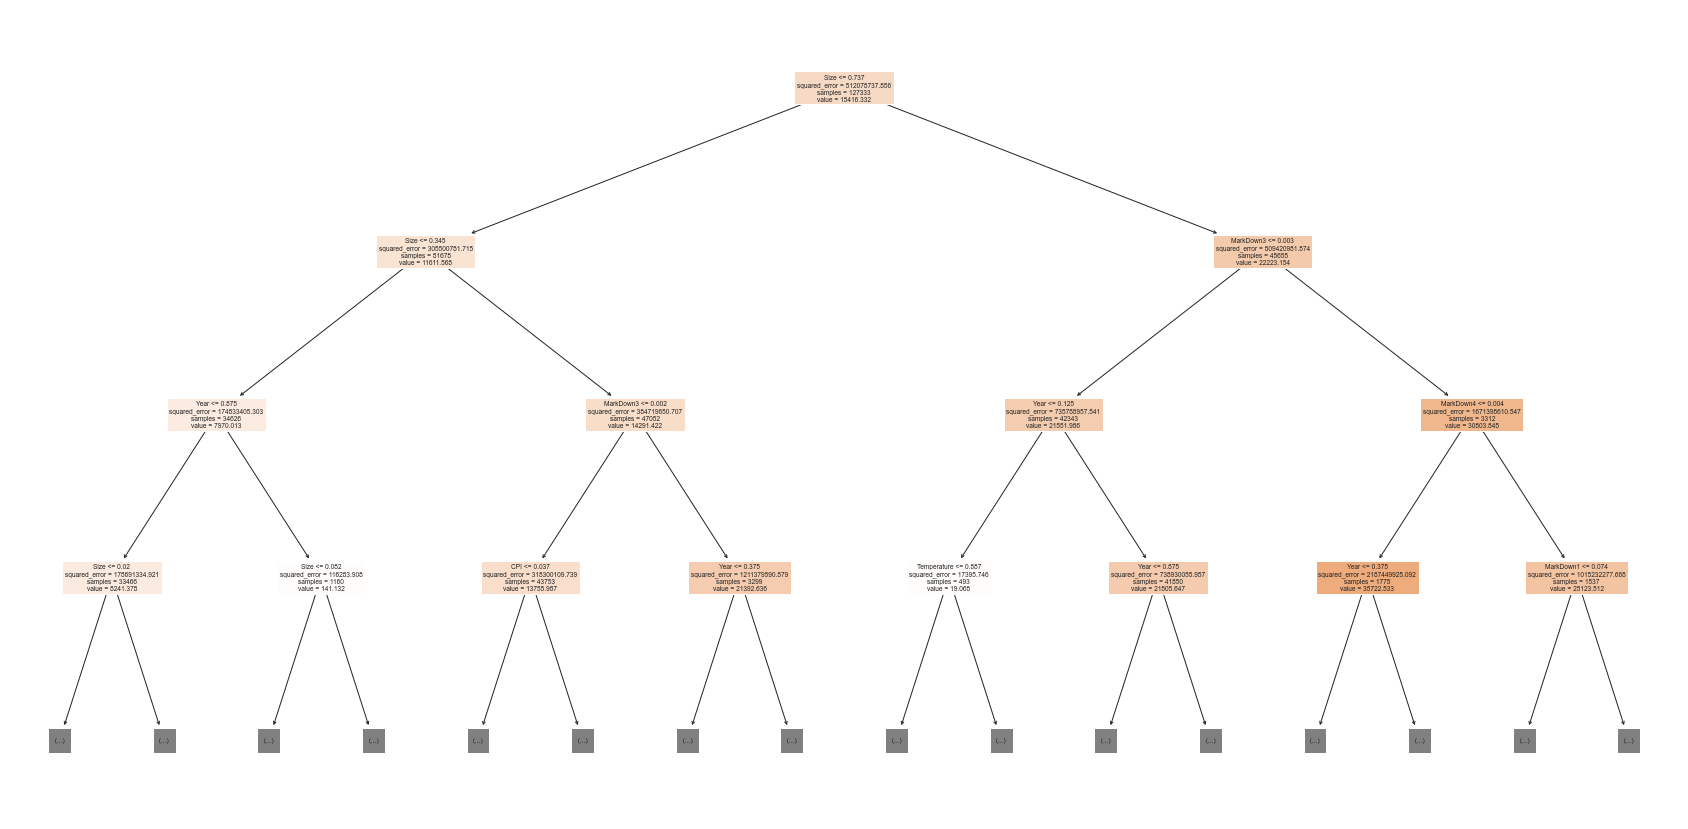

In [110]:
plt.figure(figsize=(30,15))
plot_tree(tree, feature_names=x_train.columns, max_depth=3, filled=True);

In [111]:
tree_importance = tree.feature_importances_

In [112]:
tree_importance_df = pd.DataFrame({'features' : x_train.columns,
                                   'importance': tree_importance}).sort_values('importance',ascending = False)

In [113]:
tree_importance_df

,features,importance
0,Size,0.553810
10,Year,0.090258
9,Unemployment,0.088453
8,CPI,0.076675
5,MarkDown3,0.060243
2,Fuel_Price,0.033445
1,Temperature,0.028967
6,MarkDown4,0.025774
11,Month,0.013726
3,MarkDown1,0.011686


<AxesSubplot:title={'center':'Decision Tree Feature Importance'}, xlabel='importance', ylabel='features'>

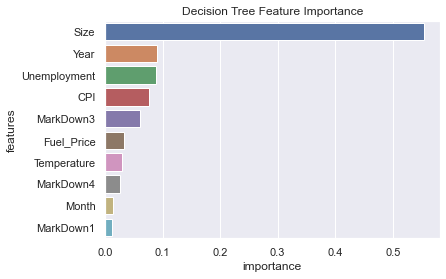

In [114]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data = tree_importance_df.head(10),x='importance',y='features')

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf_model = RandomForestRegressor(random_state= 0 , n_estimators = 10)

In [117]:
%%time 
rf_model.fit(x_train,y_train)

Wall time: 4.05 s


RandomForestRegressor(n_estimators=10, random_state=0)

In [118]:
rf1_train_pred = rf_model.predict(x_test)

In [119]:
rf1_validation_rmse = mean_squared_error(rf1_train_pred,y_test, squared=False)

In [120]:
print('Validation RMSE:{}'.format(rf1_validation_rmse))

Validation RMSE:21568.839371585585


In [1]:
#################################************************************************###############################################